In [ ]:
# ruff: noqa: E501

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from rock_physics_open.fluid_models.gas_model import gas_properties

from fmu.pem import INTERNAL_EQUINOR

In [2]:
# Define parameter ranges for our analysis
temperature = np.linspace(20.0, 200.0, 100)  # Temperature in °C
const_temp = 80.0 * np.ones_like(temperature)
pressure = np.linspace(5.0e6, 50.0e6, 100)  # Pressure in Pa
const_pressure = 20.0e6 * np.ones_like(temperature)
# Gas composition parameters
sg = np.linspace(0.6, 1.8, 100)  # Specific gravity (relative to air)
const_sg = 0.75 * np.ones_like(temperature)

# Calculate gas properties for different scenarios
# Varying specific gravity (methane-rich to heavier gas)
gas_sg = gas_properties(const_temp, const_pressure, sg)
# Varying temperature
gas_t = gas_properties(temperature, const_pressure, const_sg)
# Varying pressure
gas_p = gas_properties(const_temp, pressure, const_sg)

/private/hfle/PycharmProjects/fmu-pem/venv/lib64/python3.11/site-packages/rock_physics/fluid_models/gas_model/gas_viscosity.py:34: RuntimeWarning: invalid value encountered in power
  + (796 * p_pr**0.5 - 704) / ((t_pr - 1) ** 0.7 * (p_pr + 1))


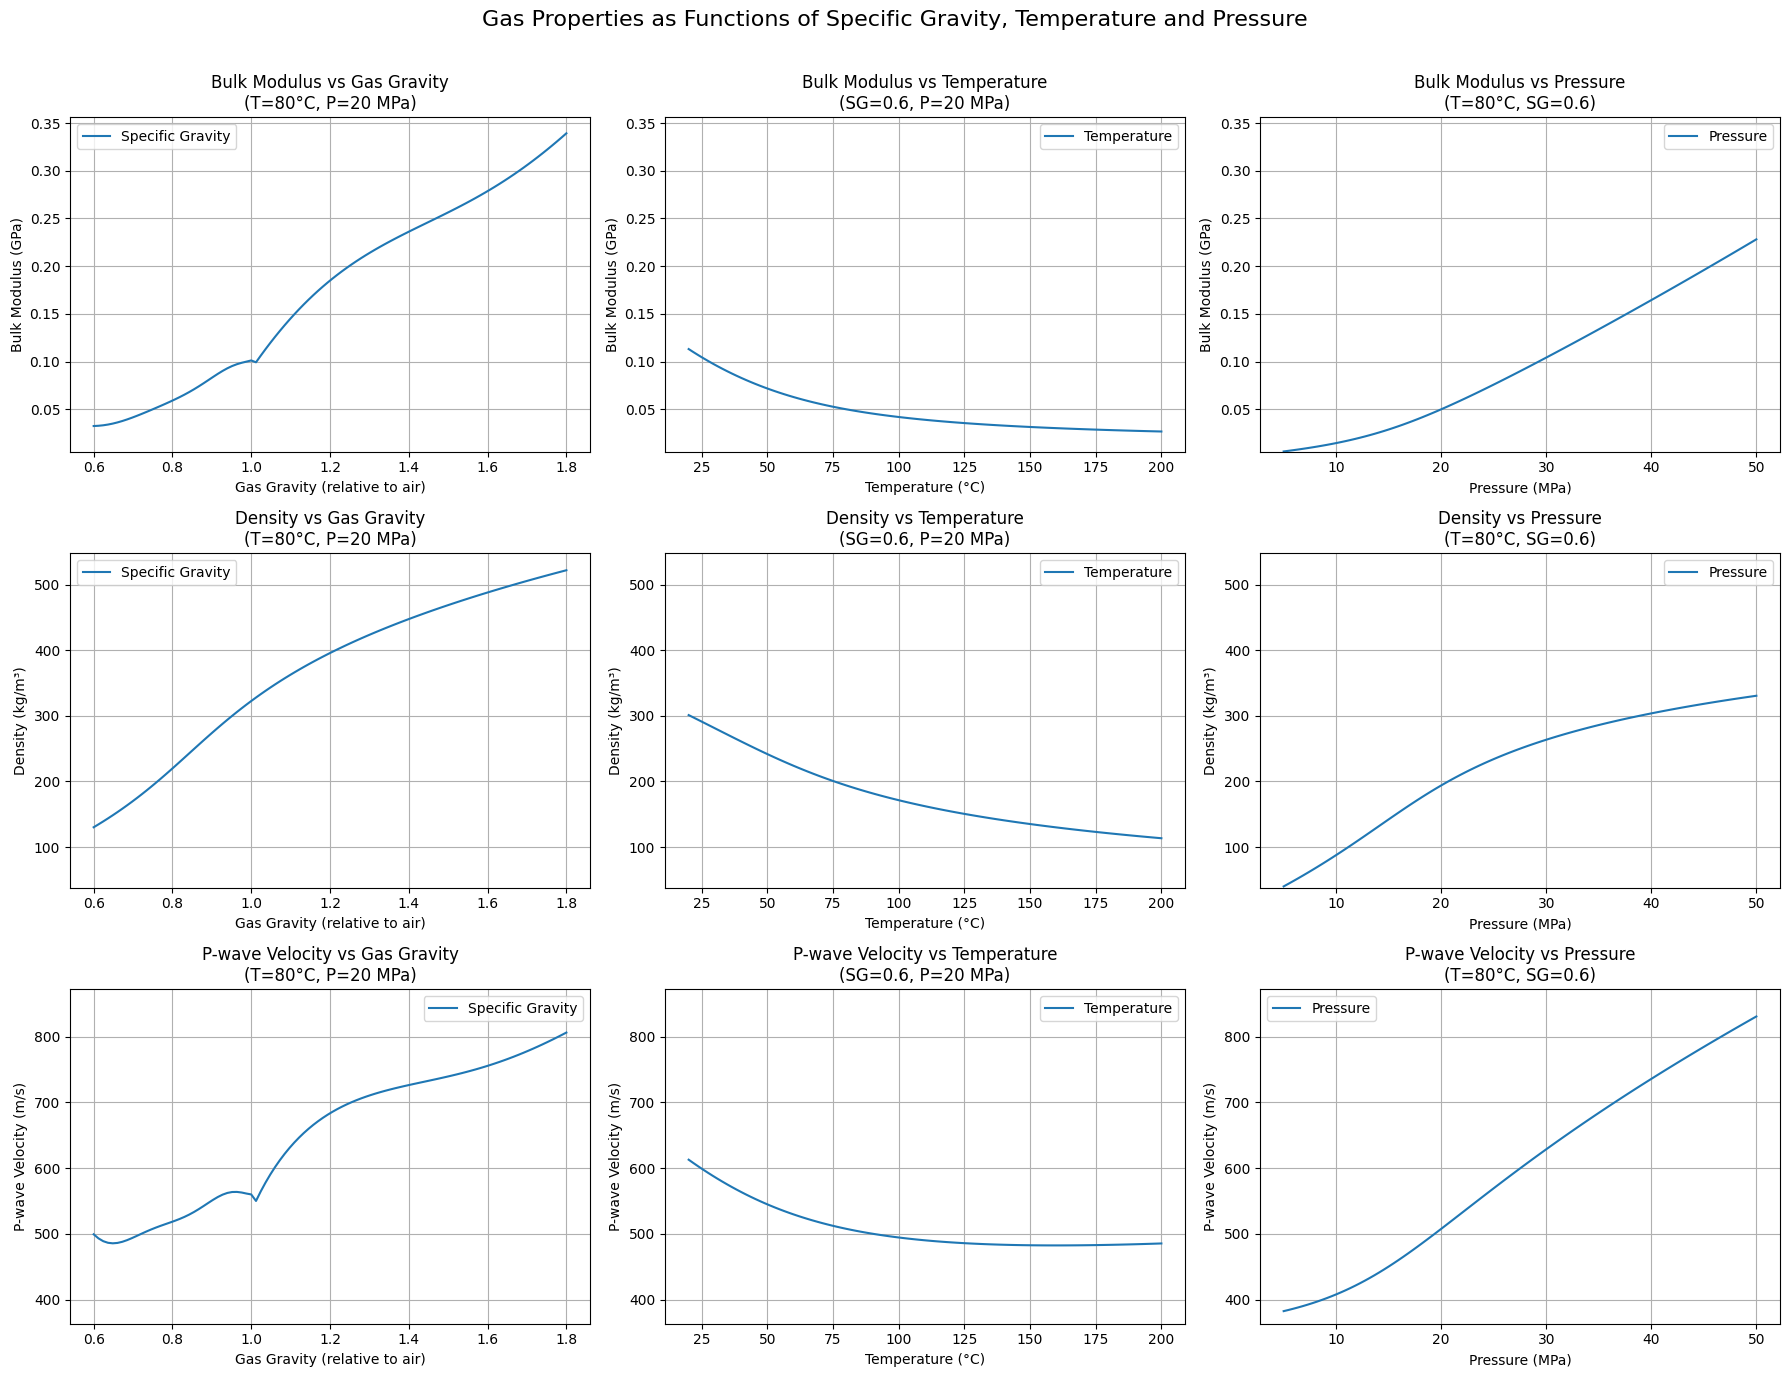

In [4]:
# Create a 3x3 grid of subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 14))

# Row 1: Bulk modulus (K)
# Gas gravity variation
axes[0, 0].plot(sg, gas_sg[2] / 1e9, label="Specific Gravity")
axes[0, 0].set_xlabel("Gas Gravity (relative to air)")
axes[0, 0].set_ylabel("Bulk Modulus (GPa)")
axes[0, 0].set_title("Bulk Modulus vs Gas Gravity\n(T=80°C, P=20 MPa)")
axes[0, 0].grid(True)
axes[0, 0].legend()

# Temperature variation
axes[0, 1].plot(temperature, gas_t[2] / 1e9, label="Temperature")
axes[0, 1].set_xlabel("Temperature (°C)")
axes[0, 1].set_ylabel("Bulk Modulus (GPa)")
axes[0, 1].set_title("Bulk Modulus vs Temperature\n(SG=0.6, P=20 MPa)")
axes[0, 1].grid(True)
axes[0, 1].legend()

# Pressure variation
axes[0, 2].plot(pressure / 1e6, gas_p[2] / 1e9, label="Pressure")
axes[0, 2].set_xlabel("Pressure (MPa)")
axes[0, 2].set_ylabel("Bulk Modulus (GPa)")
axes[0, 2].set_title("Bulk Modulus vs Pressure\n(T=80°C, SG=0.6)")
axes[0, 2].grid(True)
axes[0, 2].legend()

bulk_mod_data = np.concatenate([gas_sg[2] / 1.0e9, gas_t[2] / 1.0e9, gas_p[2] / 1.0e9])
bulk_mod_ylim = [np.min(bulk_mod_data) * 0.95, np.max(bulk_mod_data) * 1.05]
axes[0, 0].set_ylim(bulk_mod_ylim)
axes[0, 1].set_ylim(bulk_mod_ylim)
axes[0, 2].set_ylim(bulk_mod_ylim)

# Row 2: Density
# Gas gravity variation
axes[1, 0].plot(sg, gas_sg[1], label="Specific Gravity")
axes[1, 0].set_xlabel("Gas Gravity (relative to air)")
axes[1, 0].set_ylabel("Density (kg/m³)")
axes[1, 0].set_title("Density vs Gas Gravity\n(T=80°C, P=20 MPa)")
axes[1, 0].grid(True)
axes[1, 0].legend()

# Temperature variation
axes[1, 1].plot(temperature, gas_t[1], label="Temperature")
axes[1, 1].set_xlabel("Temperature (°C)")
axes[1, 1].set_ylabel("Density (kg/m³)")
axes[1, 1].set_title("Density vs Temperature\n(SG=0.6, P=20 MPa)")
axes[1, 1].grid(True)
axes[1, 1].legend()

# Pressure variation
axes[1, 2].plot(pressure / 1e6, gas_p[1], label="Pressure")
axes[1, 2].set_xlabel("Pressure (MPa)")
axes[1, 2].set_ylabel("Density (kg/m³)")
axes[1, 2].set_title("Density vs Pressure\n(T=80°C, SG=0.6)")
axes[1, 2].grid(True)
axes[1, 2].legend()

density_data = np.concatenate([gas_sg[1], gas_t[1], gas_p[1]])
density_ylim = [np.min(density_data) * 0.95, np.max(density_data) * 1.05]
axes[1, 0].set_ylim(density_ylim)
axes[1, 1].set_ylim(density_ylim)
axes[1, 2].set_ylim(density_ylim)

# Row 3: P-wave velocity (Vp)

# Gas gravity variation
axes[2, 0].plot(sg, gas_sg[0], label="Specific Gravity")
axes[2, 0].set_xlabel("Gas Gravity (relative to air)")
axes[2, 0].set_ylabel("P-wave Velocity (m/s)")
axes[2, 0].set_title("P-wave Velocity vs Gas Gravity\n(T=80°C, P=20 MPa)")
axes[2, 0].grid(True)
axes[2, 0].legend()

# Temperature variation
axes[2, 1].plot(temperature, gas_t[0], label="Temperature")
axes[2, 1].set_xlabel("Temperature (°C)")
axes[2, 1].set_ylabel("P-wave Velocity (m/s)")
axes[2, 1].set_title("P-wave Velocity vs Temperature\n(SG=0.6, P=20 MPa)")
axes[2, 1].grid(True)
axes[2, 1].legend()

# Pressure variation
axes[2, 2].plot(pressure / 1e6, gas_p[0], label="Pressure")
axes[2, 2].set_xlabel("Pressure (MPa)")
axes[2, 2].set_ylabel("P-wave Velocity (m/s)")
axes[2, 2].set_title("P-wave Velocity vs Pressure\n(T=80°C, SG=0.6)")
axes[2, 2].grid(True)
axes[2, 2].legend()

velocity_data = np.concatenate([gas_sg[0], gas_t[0], gas_p[0]])
velocity_ylim = [np.min(velocity_data) * 0.95, np.max(velocity_data) * 1.05]
axes[2, 0].set_ylim(velocity_ylim)
axes[2, 1].set_ylim(velocity_ylim)
axes[2, 2].set_ylim(velocity_ylim)

# Fix title overlap by setting layout properly
plt.subplots_adjust(top=0.9, hspace=0.4)
fig.suptitle(
    "Gas Properties as Functions of Specific Gravity, Temperature and Pressure",
    fontsize=16,
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.savefig(r"../documentation/docs/images/gas_properties_complete.png", dpi=300)
plt.show()